### About The Dataset
This dataset has details regarding various jobs in the fields of AI/ML and Data Science. Additionally, it contains te job descriptions and key skills needed to apply for a particular role.

![—Pngtree—profile with brain circuit electric_14660309.png](<attachment:—Pngtree—profile with brain circuit electric_14660309.png>)


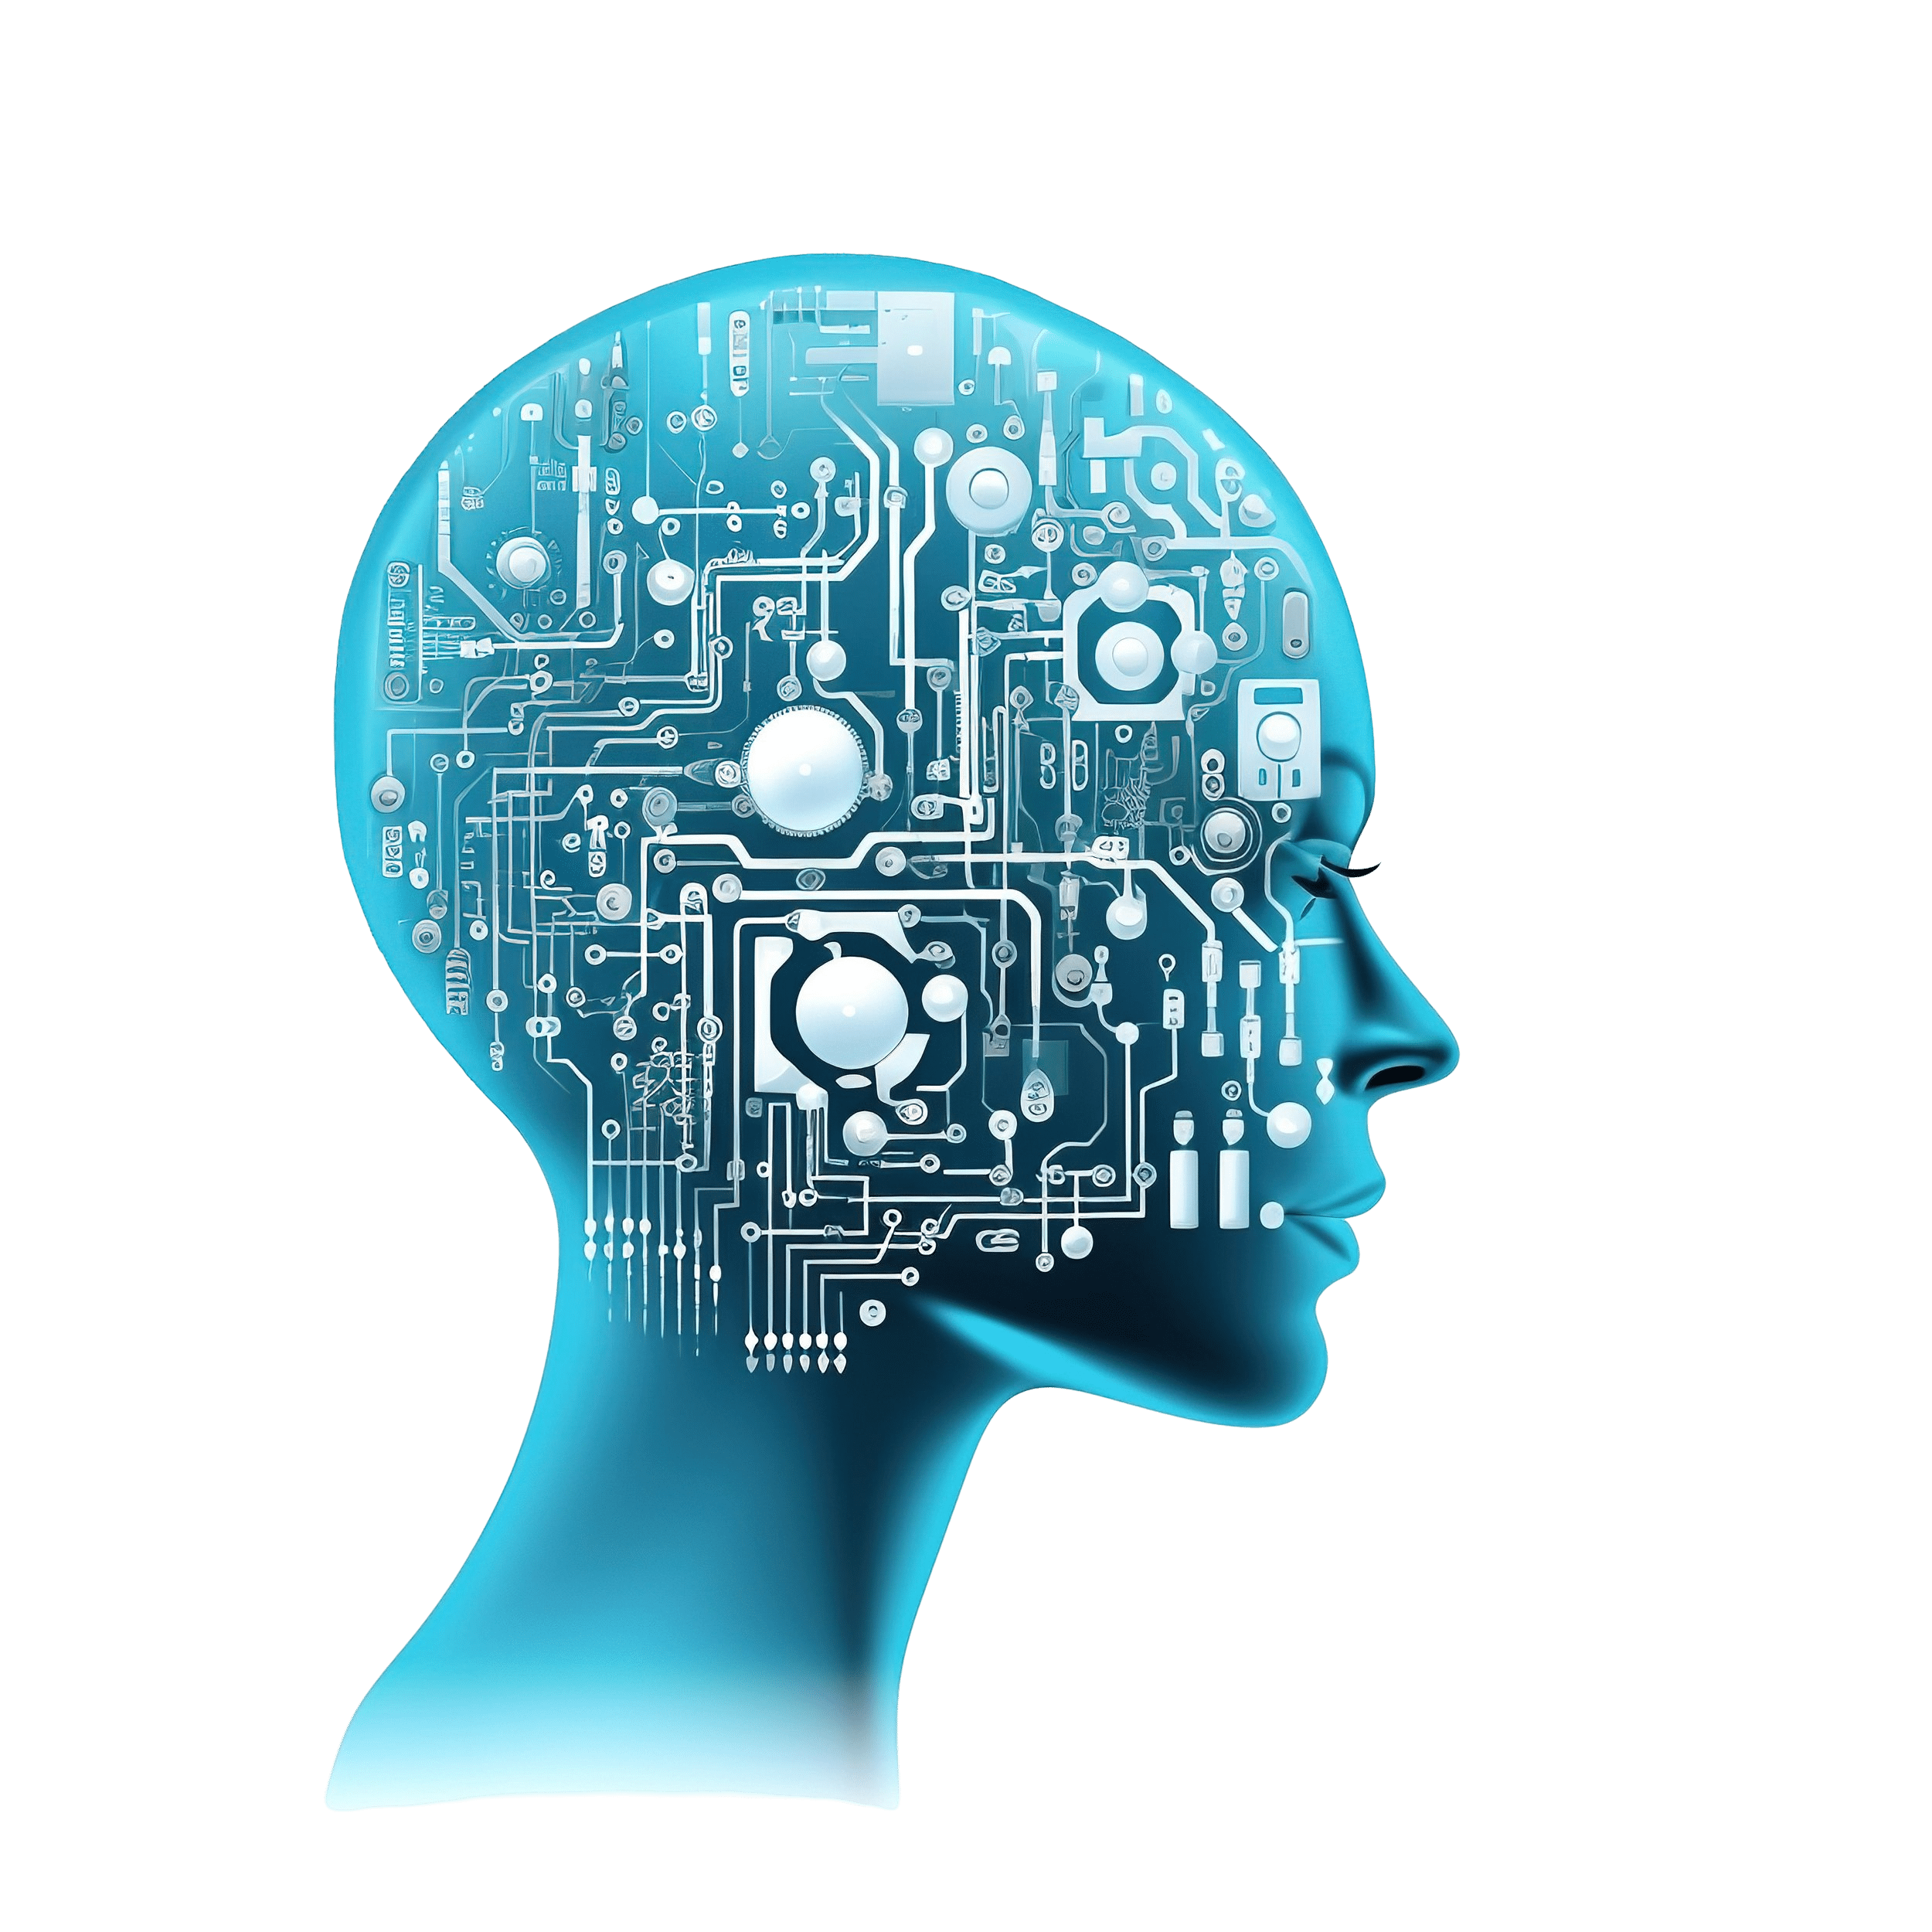

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Attribute</b></th>
            <th><b>Details</b></th>
        </tr>
        <tr>
            <td><b>Author</b></td>
            <td><b>Javed Ali</b></td>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/javed-ali92/"><img src="https://img.shields.io/badge/GitHub-Profile-purple?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/javed-ali-ai-and-data-science-8b7b7125a//"><img src="https://img.shields.io/badge/LinkedIn-Profile-purple?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="javed.ali.1121974@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-green?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

### About Libraries 
* `NumPy` is for numerical computing and working with arrays and matrices.
* `Pandas` is for data manipulation and analysis, working with structured data.
* `os `allows interacting with the operating system, working with files and directories.
* `Matplotlib` is for creating plots and visualizing data.
* `Seaborn` is for creating visually appealing statistical graphics.
* `Warnings `help handle warning messages during code execution.
* `Regular expressions` are for pattern matching and text manipulation.
* `scikit-learn `is a machine learning library, providing tools and algorithms for various tasks like regression, classification, and evaluation.

In [2]:
df=pd.read_csv('./data/final_job_list.csv')
df.head()

,Title,Company,Location,Type of Positions,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


### About This code
This code loads the data from the CSV file into a DataFrame, allowing perform various operations, such as data analysis, manipulation, and visualization, on the loaded data. The df.head() function call is used to quickly inspect the first few rows of the DataFrame

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')  
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### About This Library
* The code imports the NLTK library and downloads resources like stopwords and WordNet.
* It imports specific modules and functions from NLTK for common text processing tasks like tokenization, stemming, and lemmatization.
* Additionally, it imports modules from scikit-learn for transforming text data into numerical representations suitable for machine learning models.

In [4]:
print(df['Job Description'][2])

Clearance Level None Category Data Science Location Remote, Working from the USA 


Public Trust: MBI Full 5C (T3) 
Requisition Type: Regular 
Your Impact 
Own your opportunity to work alongside federal civilian agencies. Make an impact by providing services that help the government ensure the well being of U.S. citizens.
 Job Description

 GDIT is seeking a Data Systems Analyst/Architect to support the NIH Office of Management (OM) Administrative Systems Technology Officer (ASTO) in undertaking a multi-year effort to implement a large-scale data strategy and governance program. This initiative represents a foundational change in the data support model throughout the enterprise performance lifecycle (EPLC) of the numerous systems which provide decision support data to the multiple mission-critical areas of responsibility within the OM. This position is an internal and external customer-facing role that works directly with leadership, stakeholders, business management teams, and technic

### About This code
This code is selecting a specific value from a column in a Pandas DataFrame.
The DataFrame is called "df" and the column is called "Job Description". The code is selecting the third value from the "Job Description" column.
The code is saying "print the third value from the 'Job Description' column in the DataFrame called 'df'

In [5]:

df.columns

Index(['Title', 'Company', 'Location', 'Type of Positions', 'Job Description',
       'Salary', 'Identified_Skills'],
      dtype='object')

### About This code
This code is accessing the column names of a Pandas DataFrame.
The DataFrame is called "df" and the code is using the "columns" attribute to access the column names.
The code is saying "give me the names of the columns in the DataFrame called 'df'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              692 non-null    object 
 1   Company            692 non-null    object 
 2   Location           692 non-null    object 
 3   Type of Positions  692 non-null    object 
 4   Job Description    692 non-null    object 
 5   Salary             692 non-null    float64
 6   Identified_Skills  692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


### About This code
This code is using the info() method of a Pandas DataFrame object to display information about the DataFrame. The info() method provides a summary of the DataFrame, including the number of rows and columns, the data types of the columns, and the number of non-null values in each column. It also shows the memory usage of the DataFrame.

In [7]:
df.nunique()

Title                212
Company              207
Location              38
Type of Positions      1
Job Description      270
Salary               177
Identified_Skills    132
dtype: int64

### About This code
This code is using the nunique() method of a Pandas DataFrame object to count the number of unique values in each column of the DataFrame. The nunique() method returns a Series object containing the number of unique values in each column.
This code is counting the number of different values in each column of the DataFrame.

In [8]:
df=df.drop('Type of Positions',axis=1)
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


### About This Code
This code modifies the DataFrame by dropping a specific column and then shows a preview of the updated DataFrame.

In [9]:
df['Company'].value_counts()

Company
Recruiting From Scratch                            284
Booz Allen Hamilton                                 21
CVS Health                                          10
Microsoft                                            9
NVIDIA                                               7
                                                  ... 
Ibotta                                               1
US Assistant Secretary for Public and Indian...      1
US Office of Enterprise Integration                  1
General Atomics and Affiliated Companies             1
accelerate360                                        1
Name: count, Length: 207, dtype: int64

This code counts the occurrences of each unique value in the 'Company' column of my DataFrame (df). It gives me a count of how many times each company appears in the 'Company' column.

In [10]:
def preprocessing_text(text):
    #lemmatizer = WordNetLemmatizer()
    #emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'
    text= text.lower()
    text = text.split()
    #text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)  
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    #text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)
    return text

### About This code
This code takes in a piece of text and performs several transformations to preprocess it. The transformations include converting the text to lowercase, splitting it into words, removing numbers and special characters, and reducing extra whitespace. These preprocessing steps are commonly used to clean and standardize text data before further analysis or natural language processing tasks.

In [11]:
preprocessing_text(df['Job Description'][0])

'about thredup thredup is transforming resale with technology and a mission to inspire a new generation of consumers to think secondhand first by making it easy to buy and sell secondhand thredup has become one of the worlds largest online resale platforms for apparel shoes and accessories sellers love thredup because we make it easy to clean out their closets and unlock value for themselves or for the charity of their choice while doing good for the planet buyers love shopping value premium and luxury brands all in one place at up to off estimated retail price our proprietary operating platform is the foundation for our managed marketplace and consists of distributed processing infrastructure proprietary software and systems and data science expertise with thredups resaleasaservice some of the worlds leading brands and retailers are leveraging our platform to deliver customizable scalable resale experiences to their customers thredup has processed over million unique secondhand items 

### About This code
This code takes the job description text from the first row of the 'Job Description' column in the DataFrame and applies a series of text preprocessing steps to clean and standardize the text. The resulting preprocessed text can be used for further analysis or natural language processing tasks.

In [12]:
df['Job Description']=df['Job Description'].apply(lambda x:preprocessing_text(x))
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


### About This code
This code takes the 'Job Description' column in the DataFrame and applies the preprocessing_text function to each value in that column. It updates the 'Job Description' column with the preprocessed text, allowing you to work with cleaner and standardized text data. The df.head() line is used to preview the modified DataFrame.

In [13]:
df['Tokens']=df['Job Description'].apply(lambda x:word_tokenize(x))
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills,Tokens
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']","[about, thredup, thredup, is, transforming, re..."
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'...","[we, are, vicarious, a, talent, agency, that, ..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ...","[clearance, level, none, category, data, scien..."
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']","[bring, your, heart, to, cvs, health, every, o..."
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws...","[job, summary, we, are, seeking, an, experienc..."


### About This code
This code takes the 'Job Description' column in the DataFrame and applies the word_tokenize function to each value. It generates a list of tokens for each 'Job Description' text and adds these lists as a new column called 'Tokens' in the DataFrame. The df.head() line is used to preview the modified DataFrame.

In [14]:
english_stopwords = stopwords.words('english')

### About This code
This code retrieves a predefined list of stopwords specific to the English language. These stopwords are commonly used words that are often excluded from text analysis or natural language processing tasks because they do not provide much meaningful information. Storing the stopwords in the english_stopwords variable allows you to easily access and use them later in text processing or analysis tasks.

In [15]:
for i in df['Tokens']:
    stop=[]
    for j in i:
        if j not in english_stopwords:
            stop.append(j)


### About This code
When I run this code, I iterate through each row in the 'Tokens' column of the DataFrame df. For each row, I check if each token is a stopword. If a token is not a stopword, I add it to a new list called stop. After executing the code, I end up with a list of non-stopword tokens for each row in the DataFrame.

In [16]:
df['new']=df['Tokens'].apply(lambda x:[i for i in x if i not in english_stopwords])
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills,Tokens,new
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']","[about, thredup, thredup, is, transforming, re...","[thredup, thredup, transforming, resale, techn..."
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'...","[we, are, vicarious, a, talent, agency, that, ...","[vicarious, talent, agency, represents, establ..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ...","[clearance, level, none, category, data, scien...","[clearance, level, none, category, data, scien..."
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']","[bring, your, heart, to, cvs, health, every, o...","[bring, heart, cvs, health, every, one, us, cv..."
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws...","[job, summary, we, are, seeking, an, experienc...","[job, summary, seeking, experienced, data, sci..."



### About This code
This code adds a new column called 'new' to the DataFrame df. For each row in the 'Tokens' column, it creates a list of tokens (words) that are not in a predefined set of English stopwords (common words like 'the', 'is', 'and', etc.). These non-stopword tokens are then stored in the 'new' column. Finally, the code displays the first few rows of the updated DataFrame using df.head().

In [17]:
df['text']=df['new'].apply(lambda x:' '.join(x))
df.head()
    

,Title,Company,Location,Job Description,Salary,Identified_Skills,Tokens,new,text
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']","[about, thredup, thredup, is, transforming, re...","[thredup, thredup, transforming, resale, techn...",thredup thredup transforming resale technology...
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'...","[we, are, vicarious, a, talent, agency, that, ...","[vicarious, talent, agency, represents, establ...",vicarious talent agency represents established...
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ...","[clearance, level, none, category, data, scien...","[clearance, level, none, category, data, scien...",clearance level none category data science loc...
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']","[bring, your, heart, to, cvs, health, every, o...","[bring, heart, cvs, health, every, one, us, cv...",bring heart cvs health every one us cvs health...
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws...","[job, summary, we, are, seeking, an, experienc...","[job, summary, seeking, experienced, data, sci...",job summary seeking experienced data scientist...



### About This Code
I used the 'new' column in my DataFrame and applied the join() function to each value. This function concatenates the strings in the list for each value, separating them with a space. The resulting joined strings are added as a new column called 'text' in my DataFrame. Finally, I used df.head() to preview the modified DataFrame.

C:\Users\Dell\AppData\Local\Temp\ipykernel_13076\506952242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Location'], order=location_counts_sorted.index, palette='viridis')


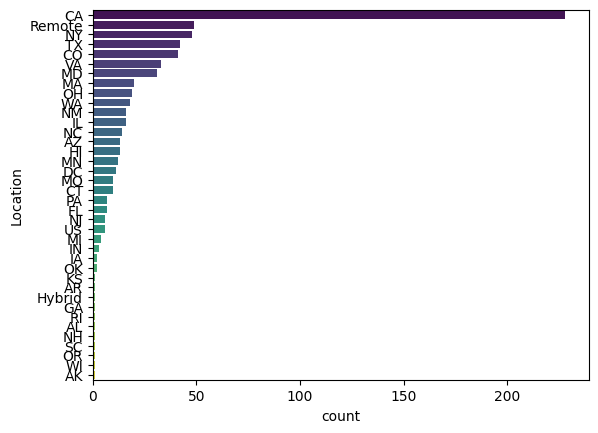

In [18]:

location_counts = df['Location'].value_counts()
location_counts_sorted = location_counts.sort_values(ascending=False)
sns.countplot(y=df['Location'], order=location_counts_sorted.index, palette='viridis')
plt.show()


### About this code
I'm counting the occurrences of each location in my DataFrame's 'Location' column. Then, I'm sorting the locations in descending order based on their counts. Next, I'm creating a countplot with the locations in descending order. Finally, I'm displaying the plot to visualize the distribution of locations.

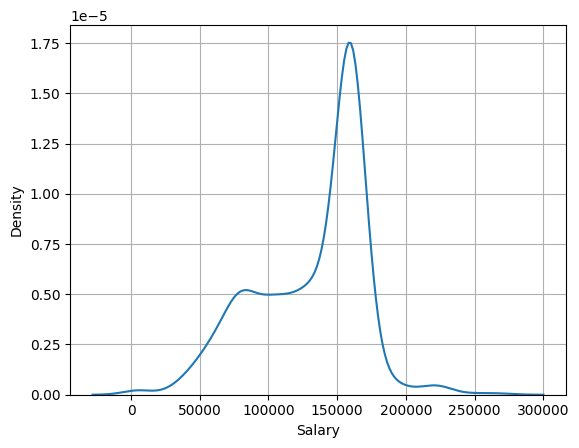

In [19]:
sns.kdeplot(df['Salary'])
plt.grid()
plt.show()


### About this code
This code creates a kernel density estimate plot (KDE plot) for the 'Salary' column in my DataFrame. It uses seaborn's kdeplot function (sns.kdeplot()) to generate the plot. Then, it adds a grid to the plot with plt.grid() and displays the plot using plt.show().

In [20]:
df['skills']=df['Identified_Skills'].apply(lambda x:[x][0])
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills,Tokens,new,text,skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']","[about, thredup, thredup, is, transforming, re...","[thredup, thredup, transforming, resale, techn...",thredup thredup transforming resale technology...,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'...","[we, are, vicarious, a, talent, agency, that, ...","[vicarious, talent, agency, represents, establ...",vicarious talent agency represents established...,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ...","[clearance, level, none, category, data, scien...","[clearance, level, none, category, data, scien...",clearance level none category data science loc...,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']","[bring, your, heart, to, cvs, health, every, o...","[bring, heart, cvs, health, every, one, us, cv...",bring heart cvs health every one us cvs health...,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws...","[job, summary, we, are, seeking, an, experienc...","[job, summary, seeking, experienced, data, sci...",job summary seeking experienced data scientist...,"['python', 'machine learning', 'tableau', 'aws..."



This code adds a new column called 'skills' to my DataFrame (df). It takes the values from the 'Identified_Skills' column and applies a lambda function to each value. The lambda function creates a list containing the value (x) and then selects the first element ([x][0]), effectively copying the value to the 'skills' column. Finally, the code displays the first few rows of the updated DataFrame using df.head().

In [21]:
tf=TfidfVectorizer()
vector=tf.fit_transform(df['text']).toarray()
data=df[['Salary','text']]
data

,Salary,text
0,190000.0,thredup thredup transforming resale technology...
1,70000.0,vicarious talent agency represents established...
2,104000.0,clearance level none category data science loc...
3,140000.0,bring heart cvs health every one us cvs health...
4,136000.0,job summary seeking experienced data scientist...
...,...,...
687,160000.0,recruiting scratch recruiting scratch premier ...
688,160000.0,recruiting scratch recruiting scratch premier ...
689,160000.0,recruiting scratch recruiting scratch premier ...
690,160000.0,recruiting scratch recruiting scratch premier ...



This code creates a TF-IDF vectorizer object (tf) to convert text data into numerical vectors. It then uses this vectorizer to transform the 'text' column of my DataFrame (df) into a matrix of TF-IDF features (vector). The resulting matrix is converted to a NumPy array. Finally, the code creates a new DataFrame called 'data' that contains the 'Salary' column and the transformed 'text' column, and displays the 'data' DataFrame.

In [22]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y=data['Salary']
x=vector

In [24]:
# Split the data into training and test sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

# Perform feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(x_train_scaled, ytrain)

# Make predictions on the test set
y_pred = lr.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r_squared = lr.score(x_test_scaled, ytest)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Squared Error: 382007086.05310905
Root Mean Squared Error: 19545.00156185998
R-squared: 0.7584296961366535


I printed the MSE, RMSE, and R-squared values to evaluate the accuracy and performance of the Linear Regression model on the test set.

In [25]:
lr=LinearRegression()

In [26]:
lr_model=lr.fit(xtrain,ytrain)
lr_model

LinearRegression()

In [27]:
lr_model.intercept_

101158.26954366505


This code retrieves the intercept value from my linear regression model (lr_model). The intercept represents the predicted value when all independent variables are zero.

In [28]:
lr_model.coef_

array([  8457.9850577 , -20470.01485315,   5592.51705719, ...,
        -3847.40354905,  -2990.06549415,   1353.58834961])

This code retrieves the coefficients from my linear regression model (lr_model). These coefficients represent the weights assigned to each independent variable in the model.

In [29]:
y_pred=lr_model.predict(xtest)
y_pred

array([160000.        , 160000.        ,  66522.58938889, 160000.        ,
        98092.80831869,  60000.        , 160000.        , 128511.61533378,
       160000.        ,  76506.52272576, 225000.        ,  91723.60179826,
       160000.        , 123626.        , 128564.61693875, 160000.        ,
       160000.        , 160000.        , 160000.        , 160000.        ,
       160000.        , 160000.        , 111738.47661124, 160000.        ,
       160000.        , 160000.        ,  97332.0808927 , 124000.        ,
       138100.        , 160000.        , 131307.43274424, 125000.        ,
       123489.79140429, 141029.98088819, 160000.        , 160000.        ,
         4145.        , 160000.        ,  71002.91207586,  69719.15394369,
       109600.        , 130929.        , 115443.83150345, 150000.        ,
        89517.20453404, 160000.        , 141900.        ,  86000.        ,
       135000.        , 160000.        , 124095.0436008 ,  71697.82603469,
       160000.        , 1


This code predicts the target variable using my linear regression model (lr_model) based on the features in the test dataset (xtest). The predicted values are stored in the variable y_pred.

In [30]:
r2_score(ytest,y_pred)

0.7925813241102209


This output shows the R-squared score of my linear regression model. The R-squared score is 0.7925813241102209, which means that approximately 79.26% of the variability in the target variable can be explained by the model.

In [31]:
np.sqrt(mean_squared_error(ytest,y_pred))

18110.80962486757

This output shows the Mean Squared Error (MSE) of my linear regression model. The MSE is 18110.80962486757, which represents the average squared difference between the actual target values (ytest) and the predicted values (y_pred).

In [32]:
lr_model.coef_

array([  8457.9850577 , -20470.01485315,   5592.51705719, ...,
        -3847.40354905,  -2990.06549415,   1353.58834961])

This code gives me the coefficients of my linear regression model (lr_model). These coefficients represent the weights assigned to each feature in the model, indicating the impact of each feature on the target variable.

In [33]:
len(lr_model.coef_)

10418


This code tells me the number of coefficients in my linear regression model (lr_model). Each coefficient corresponds to a feature in the dataset, so the length of lr_model.coef_ gives me the total number of features used in the model.

In [34]:
len(xtrain[0])

10418

This code gives me the number of elements in the first row of my training data (xtrain). It tells me how many features are present in the first data point, which is useful for understanding the dimensionality of the dataset.

In [35]:
xtrain.shape

(553, 10418)


This code gives me the shape of my training data (xtrain). It tells me the number of rows and columns in the dataset, which helps me understand the size and dimensions of the data I'm working with.

In [36]:
df_weight=pd.DataFrame(xtrain.T,columns=['desc_'+str(i) for i in range(0,xtrain.shape[0])])
df_weight

,desc_0,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_543,desc_544,desc_545,desc_546,desc_547,desc_548,desc_549,desc_550,desc_551,desc_552
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08073


This code creates a new DataFrame called df_weight by transposing my training data (xtrain) and assigning column names with a prefix 'desc_' followed by a number. Each column in df_weight corresponds to a row in the original xtrain DataFrame. The code then displays the df_weight DataFrame, showing the transposed view of the training data.

In [37]:
df_weight['weight']=pd.Series(lr_model.coef_)
df_weight.head()

,desc_0,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_544,desc_545,desc_546,desc_547,desc_548,desc_549,desc_550,desc_551,desc_552,weight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8457.985058
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20470.014853
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5592.517057
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3979.019124
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-61693.076669


In [38]:
print(f"The Base Salary for AI/ML Jobs can be interpreted as: {lr_model.intercept_}")

The Base Salary for AI/ML Jobs can be interpreted as: 101158.26954366505



This code prints a message that interprets the base salary for AI/ML jobs. It includes the intercept value from my linear regression model (lr_model), which represents the base salary when all other factors are zero.